In [1]:
import numpy as np
import pandas as pd

all_data = pd.read_csv(".\\data\\name_gender_dataset.csv")

In [2]:
import unicodedata

def normalize(name):
    name = name.lower()
    name = name.strip()
    
    nfkd_form = unicodedata.normalize('NFKD', name)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    only_ascii = only_ascii.decode('UTF-8')
    return only_ascii.strip()

all_data['Name'] = all_data['Name'].apply(normalize)
print(all_data['Name'][0])

james


In [3]:
all_data['Name Length'] = all_data['Name'].str.len()
all_data

,Name,Gender,Count,Probability,Name Length
0,james,M,5304407,1.451679e-02,5
1,john,M,5260831,1.439753e-02,4
2,robert,M,4970386,1.360266e-02,6
3,michael,M,4579950,1.253414e-02,7
4,william,M,4226608,1.156713e-02,7
...,...,...,...,...,...
147264,zylenn,M,1,2.736740e-09,6
147265,zymeon,M,1,2.736740e-09,6
147266,zyndel,M,1,2.736740e-09,6
147267,zyshan,M,1,2.736740e-09,6


In [5]:
#Esistono più nomi con sessi differenti?

all_data[['Name','Gender']].groupby(['Name'], as_index=False).count().sort_values("Gender", ascending = False)

,Name,Gender
0,a,2
94017,orville,2
10406,arline,2
84569,micaela,2
10408,arlington,2
...,...,...
47083,hildagard,1
47082,hilda-jean,1
47080,hilburn,1
47079,hilberto,1


In [6]:
name = 'luca'
filterrow = all_data['Name'] == name
all_data[filterrow]

,Name,Gender,Count,Probability,Name Length
1407,luca,M,31015,0.000085,4
10608,luca,F,1154,0.000003,4


In [7]:
all_data['Count Max'] = all_data.groupby(['Name'])['Count'].transform(max)
idx = all_data['Count'] == all_data['Count Max']
all_data_unique = all_data[idx]

In [8]:
min_number = 500
dataframe_filtered = all_data_unique[all_data_unique["Count"] >= min_number]

dataframe_filtered.head()

,Name,Gender,Count,Probability,Name Length,Count Max
0,james,M,5304407,0.014517,5,5304407
1,john,M,5260831,0.014398,4,5260831
2,robert,M,4970386,0.013603,6,4970386
3,michael,M,4579950,0.012534,7,4579950
4,william,M,4226608,0.011567,7,4226608


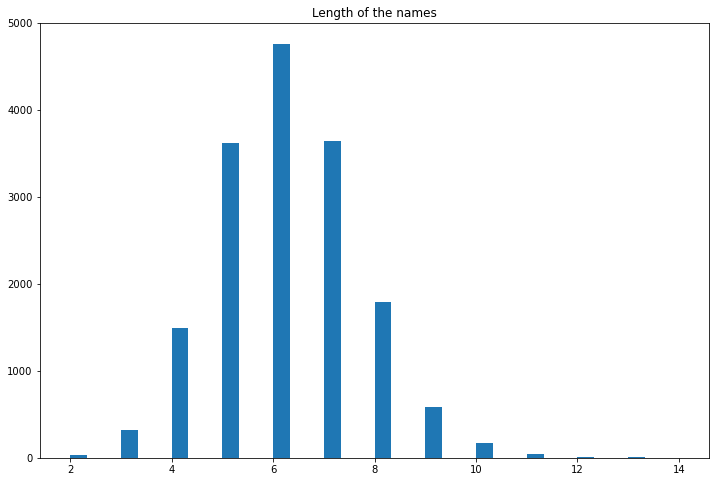

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.hist(dataframe_filtered['Name Length'], bins=36)
plt.title("Length of the names")
plt.show()

In [10]:
maxlen = dataframe_filtered['Name Length'].max()

In [11]:
dataframe_filtered['Gender'].value_counts(normalize=False)

F    10106
M     6396
Name: Gender, dtype: int64

In [12]:
dataframe_filtered.head()

,Name,Gender,Count,Probability,Name Length,Count Max
0,james,M,5304407,0.014517,5,5304407
1,john,M,5260831,0.014398,4,5260831
2,robert,M,4970386,0.013603,6,4970386
3,michael,M,4579950,0.012534,7,4579950
4,william,M,4226608,0.011567,7,4226608


In [13]:
def gender2float(gender):
    return 1.0 if gender == 'F' else 0.0

def float2gender(num, threshold=0.1):
    if num < 0.5 - threshold:
        return 'M'
    if num > 0.5 + threshold:
        return 'F'
    return 'UNKNOWN'

In [14]:
all_data['Gender'] = all_data['Gender'].apply(gender2float)

In [15]:
all_data.head()

,Name,Gender,Count,Probability,Name Length,Count Max
0,james,0.0,5304407,0.014517,5,5304407
1,john,0.0,5260831,0.014398,4,5260831
2,robert,0.0,4970386,0.013603,6,4970386
3,michael,0.0,4579950,0.012534,7,4579950
4,william,0.0,4226608,0.011567,7,4226608


In [16]:
all_data.pop("Count Max")
all_data.pop("Name Length")
all_data.head()

,Name,Gender,Count,Probability
0,james,0.0,5304407,0.014517
1,john,0.0,5260831,0.014398
2,robert,0.0,4970386,0.013603
3,michael,0.0,4579950,0.012534
4,william,0.0,4226608,0.011567


In [17]:
def features(name):
    return {
        'first-letter': name[0], # First letter
        'first2-letters': name[0:2], # First 2 letters
        'first3-letters': name[0:3], # First 3 letters
        'last-letter': name[-1],
        'last2-letters': name[-2:],
        'last3-letters': name[-3:],
    }

features = np.vectorize(features)

In [18]:
features("fabio")

array({'first-letter': 'f', 'first2-letters': 'fa', 'first3-letters': 'fab', 'last-letter': 'o', 'last2-letters': 'io', 'last3-letters': 'bio'},
      dtype=object)

In [19]:
namedataset = features(dataframe_filtered['Name'])

In [20]:
genderdataset = dataframe_filtered['Gender'].apply(gender2float)
genderdataset

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18132    0.0
18133    0.0
18134    0.0
18135    0.0
18136    0.0
Name: Gender, Length: 16502, dtype: float64

In [21]:
from sklearn.feature_extraction import DictVectorizer
 
corpus = features(["fabio", "stefano"])
dv = DictVectorizer()
dv.fit(corpus)
transformed = dv.transform(corpus)
transformed.todense()

matrix([[1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.]])

In [22]:
dv.get_feature_names()

['first-letter=f',
 'first-letter=s',
 'first2-letters=fa',
 'first2-letters=st',
 'first3-letters=fab',
 'first3-letters=ste',
 'last-letter=o',
 'last2-letters=io',
 'last2-letters=no',
 'last3-letters=ano',
 'last3-letters=bio']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(namedataset, genderdataset, test_size=0.20)

In [24]:
dv = DictVectorizer()
X_train = dv.fit_transform(X_train)

In [25]:
X_train
X_train.shape

(13201, 4287)

In [26]:
X_test = dv.transform(X_test)
X_test.shape

(3301, 4287)

In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import time

selector = SelectKBest(mutual_info_classif, k=2000)

start = time.time()
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
end = time.time()
print("Elaborazione eseguita in {0:.2f} secondi".format(end - start))


Elaborazione eseguita in 9.48 secondi


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

gnbmodel = GaussianNB()
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbgrid = GridSearchCV(estimator=gnbmodel, param_grid=param_grid_nb, verbose=1, cv=3, n_jobs=-1)

start = time.time()
nbgrid.fit(X_train.todense(), y_train)
end = time.time()
print("Elaborazione eseguita in {0:.2f} secondi".format(end - start))


print("L'accuratezza del modello è {0:.2f}%".format(nbgrid.best_score_ * 100))
print(nbgrid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Elaborazione eseguita in 371.77 secondi
L'accuratezza del modello è 88.25%
{'var_smoothing': 0.002848035868435802}


In [29]:
y_hat = nbgrid.predict(X_test.todense())

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("L'accuratezza del modello in test {0:.2f}%".format(accuracy_score(y_test, y_hat) * 100))
print(classification_report(y_test, y_hat))


L'accuratezza del modello in test 87.40%
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1249
         1.0       0.88      0.93      0.90      2052

    accuracy                           0.87      3301
   macro avg       0.87      0.86      0.86      3301
weighted avg       0.87      0.87      0.87      3301



In [31]:
import seaborn as sn

#sn.heatmap(confusion_matrix(y_test, y_hat), annot=True)

confusion_matrix(y_test, y_hat)

array([[ 980,  269],
       [ 147, 1905]], dtype=int64)

In [32]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {"C": np.linspace(1, 10,num = 20),"penalty":['l1', 'l2']}
svcmodel = LinearSVC()

svcmodelgrid = RandomizedSearchCV(svcmodel, param_distributions, verbose=1, cv=5, n_jobs=-1)

start = time.time()
svcmodelgrid.fit(X_train, y_train)
end = time.time()
print("Elaborazione eseguita in {0:.2f} secondi".format(end - start))


print("L'accuratezza del modello è {0:.2f}%".format(svcmodelgrid.best_score_ * 100))
print(svcmodelgrid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elaborazione eseguita in 6.69 secondi
L'accuratezza del modello è 88.49%
{'penalty': 'l2', 'C': 1.4736842105263157}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88144852 0.8805394  0.88493313 0.88016067
        nan 0.88076673        nan 0.88053942]
  warnings.warn(


In [33]:
y_hat = svcmodelgrid.predict(X_test)

print("L'accuratezza del modello in test {0:.2f}%".format(accuracy_score(y_test, y_hat) * 100))
print(classification_report(y_test, y_hat))


L'accuratezza del modello in test 87.94%
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1249
         1.0       0.90      0.90      0.90      2052

    accuracy                           0.88      3301
   macro avg       0.87      0.87      0.87      3301
weighted avg       0.88      0.88      0.88      3301



In [34]:
confusion_matrix(y_test, y_hat)

array([[1054,  195],
       [ 203, 1849]], dtype=int64)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {'n_estimators':[100,300,500,700],'max_depth':[1,3,5]}
gmodel = GradientBoostingClassifier()
ggrid = GridSearchCV(estimator=gmodel, param_grid=param_distributions, verbose=1, cv=5, n_jobs=-1)


start = time.time()
ggrid.fit(X_train, y_train)
end = time.time()
print("Elaborazione eseguita in {0:.2f} secondi".format(end - start))


print("L'accuratezza del modello è {0:.2f}%".format(ggrid.best_score_ * 100))
print(ggrid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Elaborazione eseguita in 65.93 secondi
L'accuratezza del modello è 87.36%
{'max_depth': 5, 'n_estimators': 700}


In [36]:
y_hat = ggrid.predict(X_test)

print("L'accuratezza del modello in test {0:.2f}%".format(accuracy_score(y_test, y_hat) * 100))
print(classification_report(y_test, y_hat))

L'accuratezza del modello in test 87.64%
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1249
         1.0       0.90      0.90      0.90      2052

    accuracy                           0.88      3301
   macro avg       0.87      0.87      0.87      3301
weighted avg       0.88      0.88      0.88      3301



In [37]:
confusion_matrix(y_test, y_hat)

array([[1056,  193],
       [ 215, 1837]], dtype=int64)

In [45]:
prova = ['fabio','luca','stefano','flats','stefania','fomamak']
X_prova = dv.transform(features(prova))
X_prova = selector.transform(X_prova)
X_prova

<6x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [46]:
X_prova_result = ggrid.predict_proba(X_prova)
X_prova_result[:,1]

array([0.06381768, 0.34772895, 0.08118477, 0.22443729, 0.97479757,
       0.04955789])

In [47]:
X_prova_result = [float2gender(i) for i in X_prova_result[:,1]]
X_prova_result

['M', 'M', 'M', 'M', 'F', 'M']

In [48]:
X_prova_result = svcmodelgrid.predict(X_prova)
X_prova_result

array([0., 0., 0., 1., 1., 0.])

In [49]:
X_prova_result = [float2gender(i) for i in X_prova_result]
X_prova_result

['M', 'M', 'M', 'F', 'F', 'M']

In [43]:
import pickle
filename = 'boosted_model.sav'
pickle.dump(ggrid, open(filename, 'wb'))

In [44]:
import pickle
filename = 'svc_model.sav'
pickle.dump(svcmodelgrid, open(filename, 'wb'))

In [58]:
with open('allnames.txt') as f:
    names = f.read().splitlines() 
    
df = pd.DataFrame(data = names,  columns = ['Name'])
df['Name'] = df['Name'].apply(normalize)
extracted = features(df['Name'])
extracted = dv.transform(extracted)
extracted = selector.transform(extracted)
df['Gender'] = svcmodelgrid.predict(extracted)

In [59]:
df

,Name,Gender
0,fomamak,0.0
1,terope,1.0
2,naish,0.0
3,croos,0.0
4,yos,0.0
...,...,...
2878,billa,1.0
2879,ainon,1.0
2880,price,1.0
2881,erice,1.0


In [78]:
for index, row in df.iterrows():
    name = row['Name']
    
    filterrow = all_data_unique['Name'] == name
    correct_gender = all_data_unique[filterrow]
    
    if len(correct_gender) > 0:
        df.at[index,'Correct Gender'] = gender2float(correct_gender['Gender'].values[0])

,Name,Gender,Correct Gender
2,naish,0.0,0.0
8,gracey,1.0,1.0
10,ireen,1.0,1.0
11,nicey,1.0,1.0
21,milyn,1.0,1.0
...,...,...,...
2860,sony,0.0,0.0
2861,oakes,0.0,0.0
2878,billa,1.0,1.0
2880,price,1.0,0.0


In [80]:
check = df.dropna(subset=['Correct Gender']).copy()
test = check['Gender'] == check['Correct Gender']

test.mean()

0.829105473965287

In [81]:
for index, row in df.iterrows():
    gender = row['Gender']
    correct = row['Correct Gender']
    
    if not pd.isna(correct):
        df.at[index,'Gender'] = correct

df

,Name,Gender,Correct Gender
0,fomamak,0.0,NaN
1,terope,1.0,NaN
2,naish,0.0,0.0
3,croos,0.0,NaN
4,yos,0.0,NaN
...,...,...,...
2878,billa,1.0,1.0
2879,ainon,1.0,NaN
2880,price,0.0,0.0
2881,erice,0.0,0.0


In [82]:
df.pop("Correct Gender")
df.head()

,Name,Gender
0,fomamak,0.0
1,terope,1.0
2,naish,0.0
3,croos,0.0
4,yos,0.0


In [83]:
df.to_csv('titanic_names.csv', index=False)